#### Classification of Wines Into 3 Cultivars on the Basis of Various Parameters

## **II. Introduction**

Winemaking is a complex process involving and affected by various factors that countless winemakers and connoisseurs have sought to understand in their quest towards high quality wine. Since wine is created from the fermentation of grapes, there is an inherent relationship between the cultivar, the specific variety of grape that is bred & cultivated for winemaking, and the wine itself. Each cultivar is known for distinct characteristics, taste, and style (Marzano et al., 2016). Various studies over the years have been conducted on how specific cultivars are related to different physical and chemical profiles (Restuccia et al., 2017).

Based on this connection, the group will be answering the following question: can a wine’s chemical composition be used to predict the grape cultivar that it was made from? The data set that will be used is named Wine, taken from the UC Irvine Machine Repository (Aeberhard & Forina, 1991). It is derived from a chemical analysis conducted on wines produced from grapes of 3 different cultivars, but within the same area in Italy. 13 different characteristics were measured and quantified from the 3 wines. The amount of certain chemical compounds comprise most of the data, such as alcohol content. 178 observations are present in the data set, each classified as either 1, 2, or 3 to indicate its cultivar. 

In [1]:
# loading all the packages we need for our proposal
library(tidyverse)
library(utils)
library(tidymodels)
library(rvest)
library(GGally)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# Source: https://archive.ics.uci.edu/dataset/109/wine

# This cell proceeds to connect to the URL and download the data as tempfile to avoid
# having to download it locally.
temp <- tempfile()
url_ <- "https://archive.ics.uci.edu/static/public/109/wine.zip"
download.file(url_,temp)

In [3]:
# Using this method, we successfully read the zipped data directly from source website 
# without downloading it!
wine_data <- read_delim(unz(temp,"wine.data"), delim = ",", col_name = FALSE)|>
             mutate(X1 = as_factor(X1))
unlink(temp)

# To proceed, we decided to copy the column names directly from the source page (given above)
colnames(wine_data) <- c('class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
                         'Nonflavanoid_phenols','Proanthocyanins','Color_intensity', 'Hue','OD280_OD315_of_diluted_wines',
                         'Proline')

wine_data 
# We can see that after adding column names, the data is already in a tidy format.
# Each observation has its own row, with each column referencing a single variable, and each cell
# containing one value. 

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
# Now, we will explore the data and see the distribution of the 3 classes
num_obs <- nrow(wine_data)
num_obs
wine_data|>
    group_by(class)|>
     summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
# The result shows that the data set has a relatively balanced distribution of the 3 classes

[1] 178

class,count,percentage
<fct>,<int>,<dbl>
1,59,33.14607
2,71,39.88764
3,48,26.96629


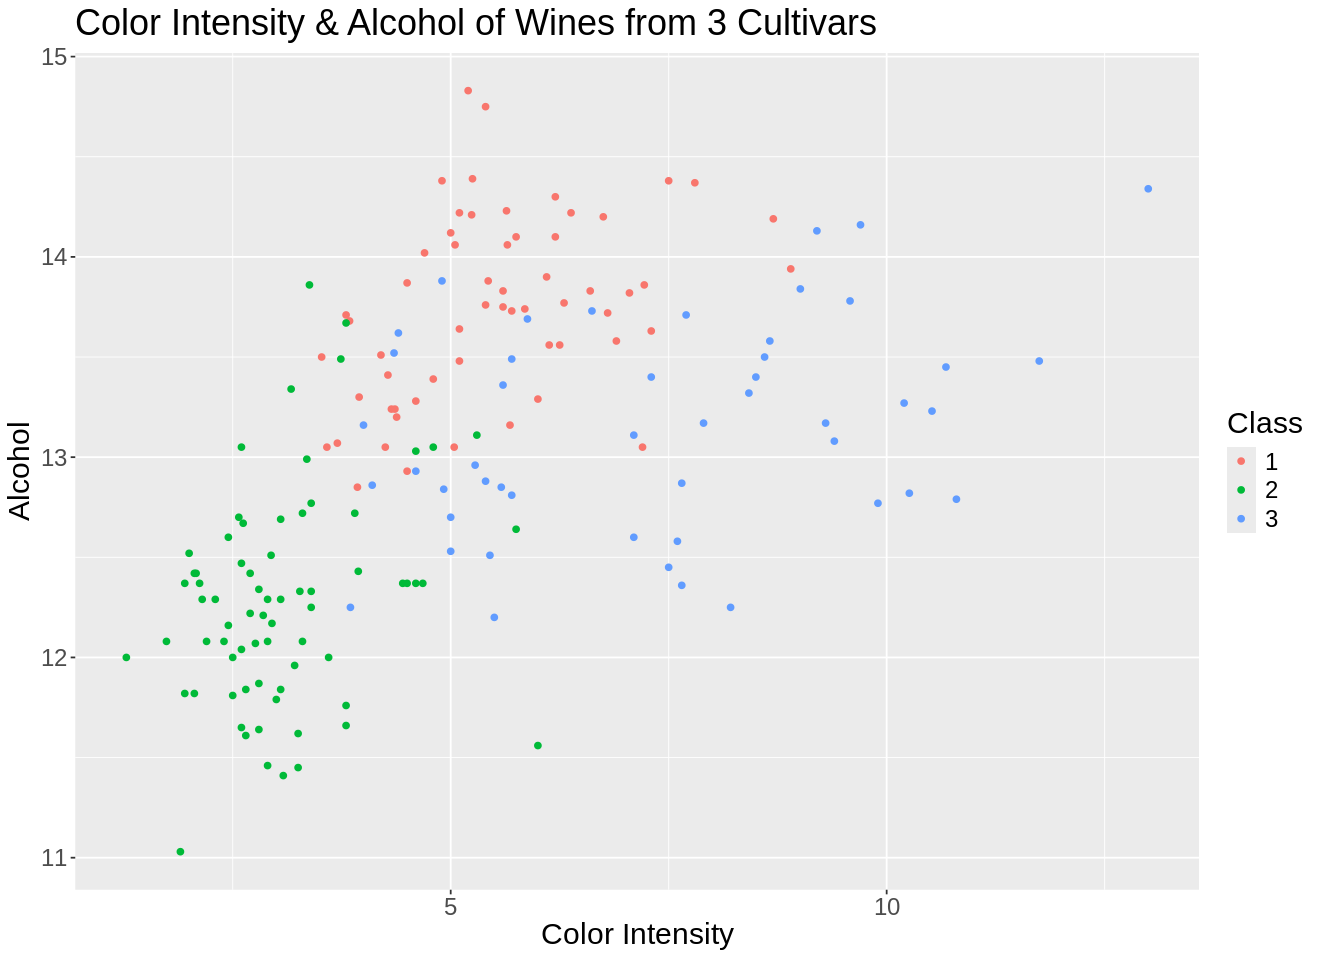

In [5]:
# We plot the color intensity and alcohol to see how the classes are distributed 
# with regards to the two variables.
# Note: No units were provided in the source of the data set so none are included in axes labels.
options(repr.plot.width =11 , repr.plot.height = 8)
Color_intensity_Alcohol <- ggplot(wine_data, aes(x = Color_intensity, y = Alcohol, color = class)) +
                           geom_point() +
                           labs(x = "Color Intensity", y = "Alcohol", color = "Class") + 
                           ggtitle("Color Intensity & Alcohol of Wines from 3 Cultivars") +
                           theme(text = element_text(size = 18))
                           
Color_intensity_Alcohol

In [6]:
# We set the seed to make sure our outcome is repeatable
set.seed(333)

wine_split <- initial_split(wine_data, prop = 0.75, strata = class)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




[1] "Proline"                      "Flavanoids"                  
[3] "Alcohol"                      "Color_intensity"             
[5] "OD280_OD315_of_diluted_wines"

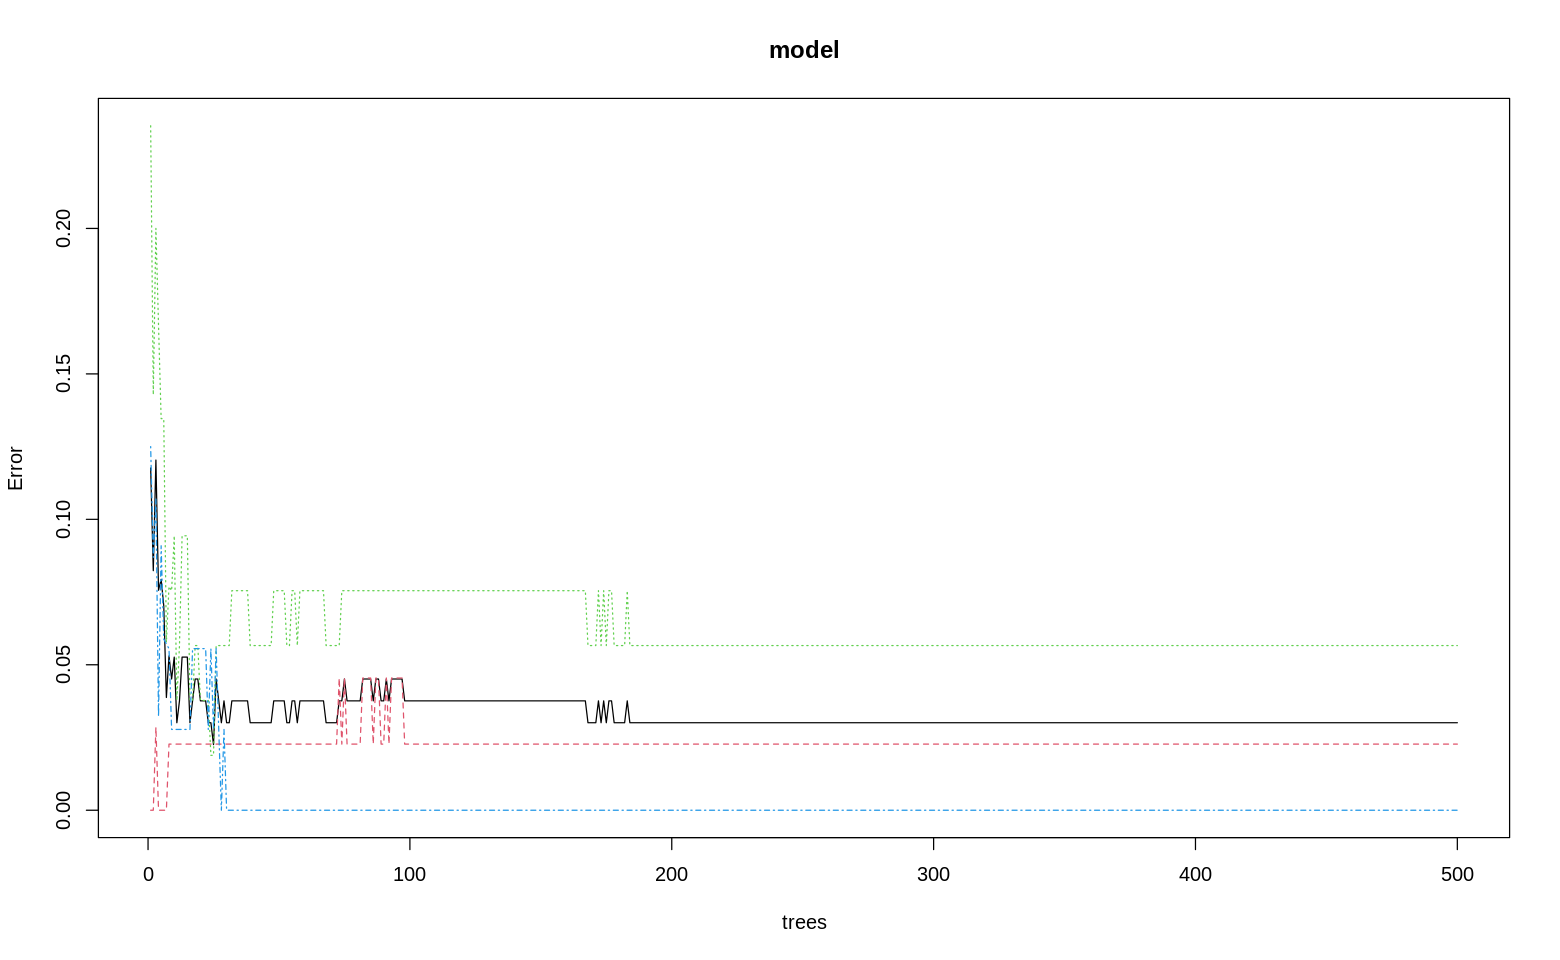

In [7]:
# We set the seed to make sure our outcome to be repeatable
set.seed(333)

# Using the random forest method to find out the 5 variables that have the strongest correlation with the 
# class variable (Breiman et al., 2022; R-Bloggers, 2021)
library(randomForest)
model <- randomForest(class ~ ., data = wine_training)
importance <- importance(model)
important_variables <- data.frame(Variable = row.names(importance), 
                            Importance = importance[, "MeanDecreaseGini"], 
                            row.names = NULL)|>
                 slice_max(importance, n = 5)|>
                 pull(Variable)
important_variables 
# Now, we know the top 5 most important variables. Even if we changed the seed to conduct different tests, 
# the results are very stable and convincing.
# The results for the five variables with the strongest correlations are consistent, although there may 
# be differences in order.

options(repr.plot.width =13 , repr.plot.height = 8)
plot(model) 
# The plot shows that our random forest model has a very high accuracy in the end, 
# with the errors for all variables below 0.1.

In [8]:
wine_training_select <- select(wine_training,class, all_of(important_variables))|>
                 glimpse()

# Using group_by + summarize to see the sample number and percentage of each class and the mean value 
# of each variable for the three classes
num_obs_training <- nrow(wine_training_select)
group_by(wine_training_select, class)|>
summarize(count = n(),
          percentage = n() / num_obs_training * 100,
          across(all_of(important_variables), mean))
# The results show that there is a significant difference in the mean values of the different variables 
# depending on the factor (class). Therefore, this data is suitable for classification purposes.

Rows: 133
Columns: 6
$ class                        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Proline                      <dbl> 1050, 1185, 1480, 1450, 1045, 1045, 1510,…
$ Flavanoids                   <dbl> 2.76, 3.24, 3.49, 3.39, 2.98, 3.15, 3.32,…
$ Alcohol                      <dbl> 13.20, 13.16, 14.37, 14.20, 14.83, 13.86,…
$ Color_intensity              <dbl> 4.38, 5.68, 7.80, 6.75, 5.20, 7.22, 5.75,…
$ OD280_OD315_of_diluted_wines <dbl> 3.40, 3.17, 3.45, 2.85, 2.85, 3.55, 3.17,…


class,count,percentage,Proline,Flavanoids,Alcohol,Color_intensity,OD280_OD315_of_diluted_wines
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,44,33.08271,1115.4545,3.0172727,13.70568,5.611818,3.110227
2,53,39.84962,510.4906,2.1288679,12.16642,3.132642,2.784906
3,36,27.06767,629.4444,0.7563889,13.07722,7.530833,1.643611


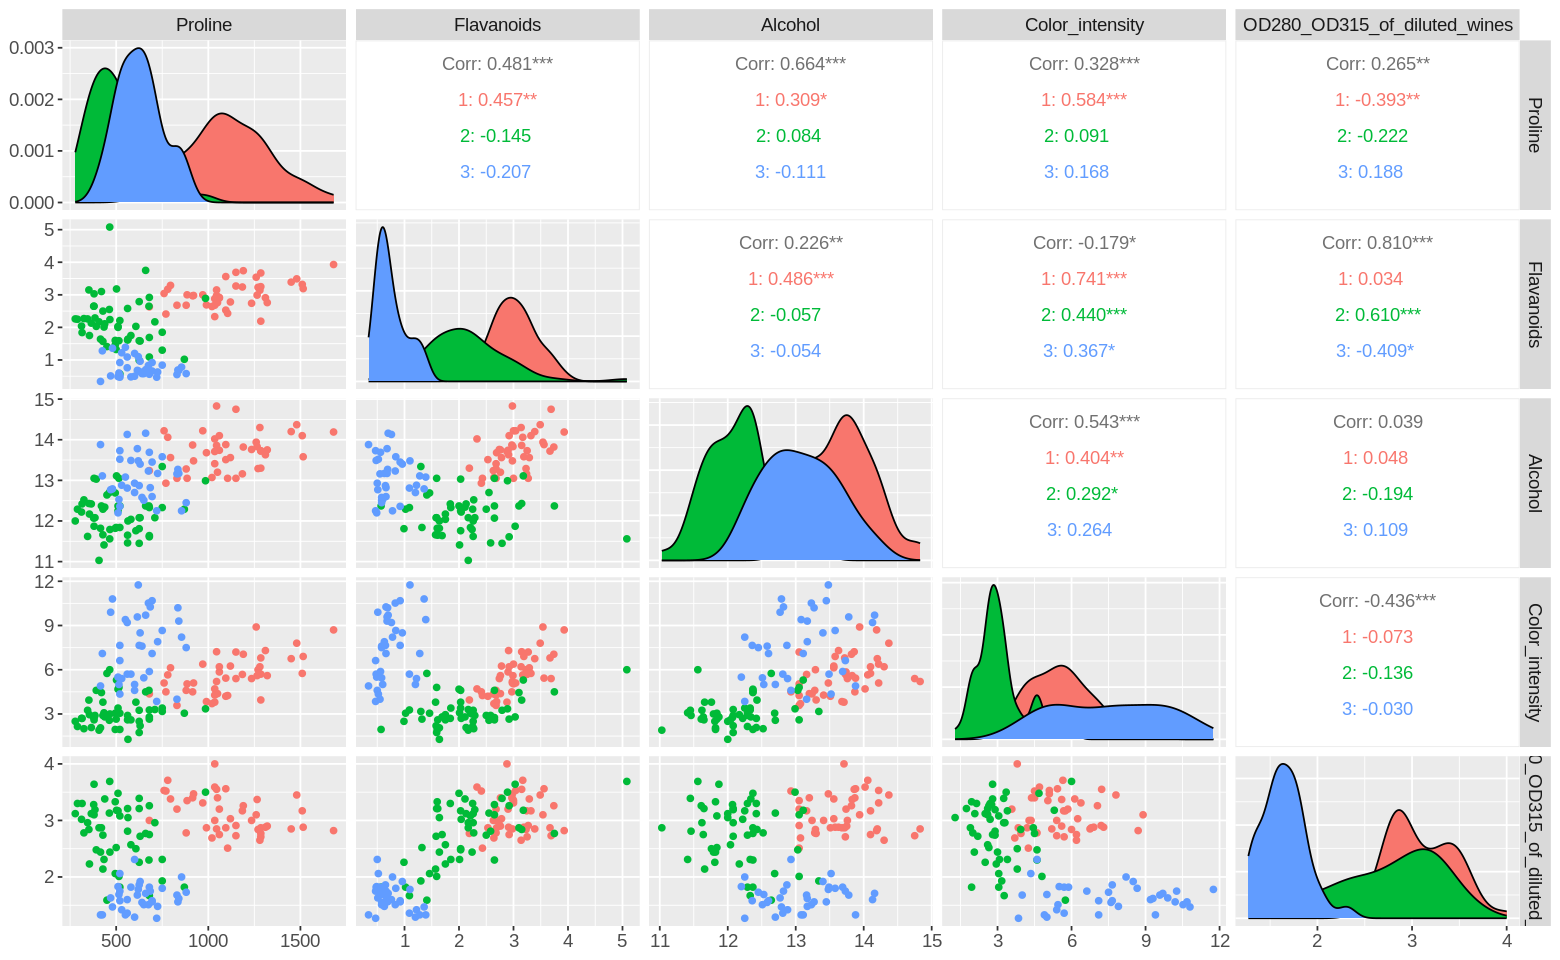

In [9]:
options(repr.plot.width =13 , repr.plot.height = 8) 

# We use the scatter matrix to show the distribution of classes and the correlation among our 
# selected variables.
ggpairs(wine_training_select, columns = important_variables, ggplot2::aes(colour=class)) + theme(text = element_text(size = 14))
# The outcome reveals that the 5 variables we selected as predictors have clear correlations with the 
# class variables in their distributions.
# They also have some degree of mutual correlations, but this wouldn't affect the effectiveness of the 
# K-nearest neighbor method too much, since we can see clear boundaries for the class distribution.

In [10]:
# Using cross-validation to tune the classifier before deciding on K-neighbors

# We set the seed to make sure our conclusion to be repeatable
set.seed(333)

wine_vfold <- vfold_cv(wine_training_select, v = 5,strata = class)

wine_recipe <- recipe(class~.,
                     data = wine_training_select)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
                  set_engine("kknn") |>
                  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 51, by = 2))


knn_results <- workflow() |>
      add_recipe(wine_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = wine_vfold, grid = k_vals) |>
      collect_metrics()

accuracies <- knn_results |>
      filter(.metric == "accuracy")

accuracies             

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9629223,5,0.01660896,Preprocessor1_Model01
3,accuracy,multiclass,0.9703297,5,0.01819005,Preprocessor1_Model02
5,accuracy,multiclass,0.9774725,5,0.01525653,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,accuracy,multiclass,0.9618006,5,0.01217510,Preprocessor1_Model24
49,accuracy,multiclass,0.9698006,5,0.01431890,Preprocessor1_Model25
51,accuracy,multiclass,0.9541083,5,0.01887702,Preprocessor1_Model26


mean,neighbors
<dbl>,<dbl>
0.9846154,39
0.9846154,41
0.9774725,5
0.9769231,21
0.9769231,23


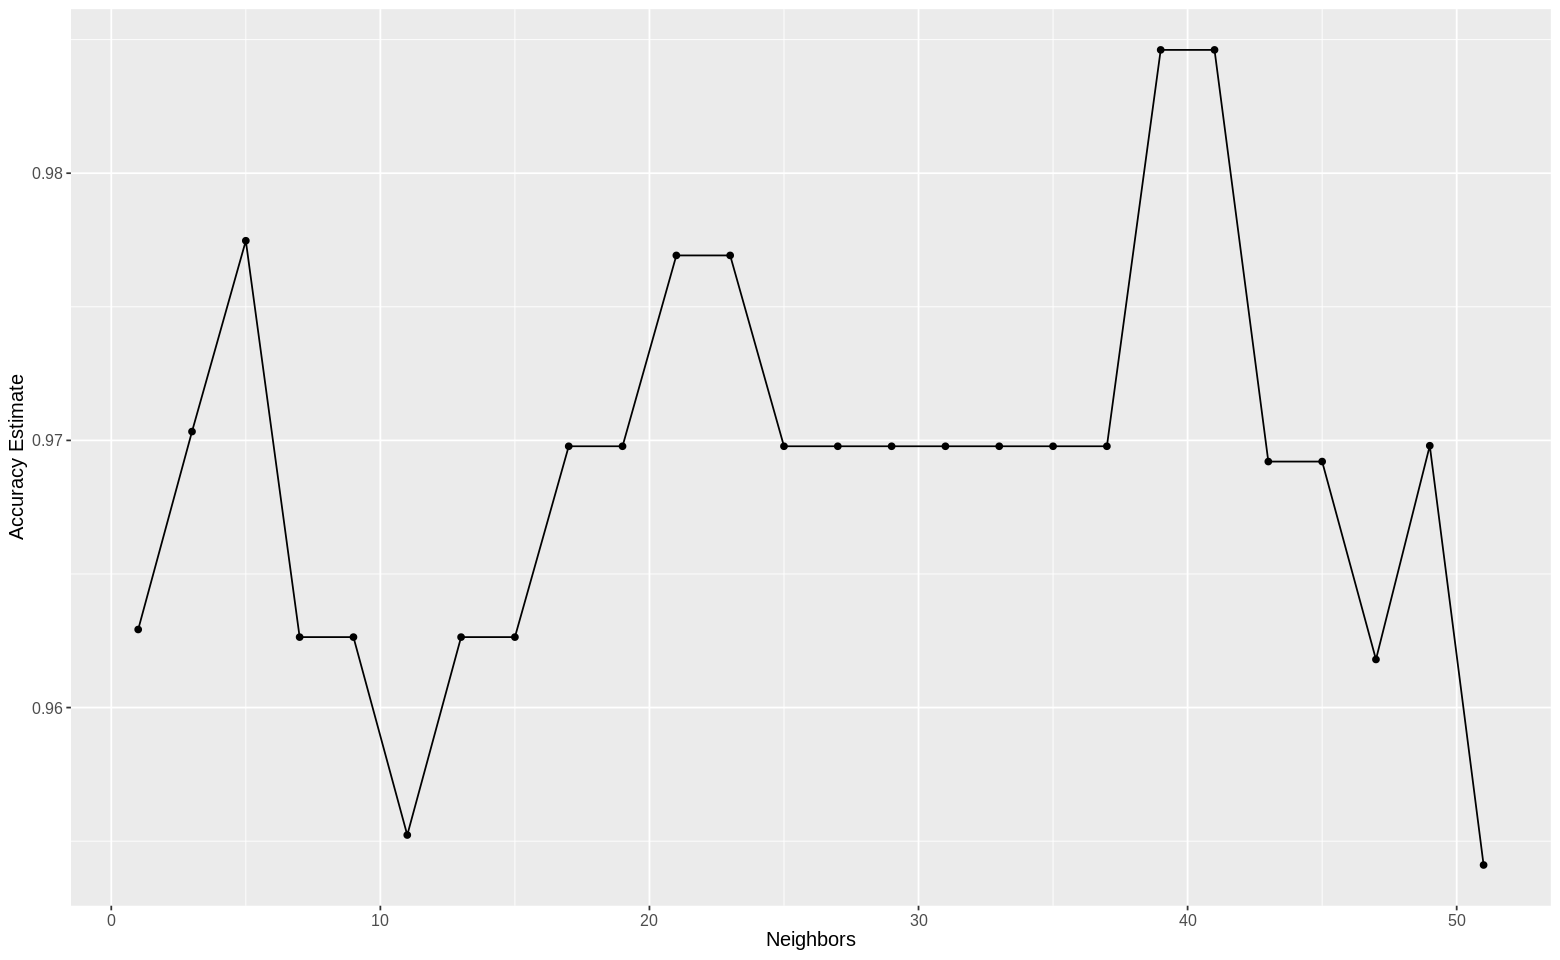

In [11]:
# We present how the accuracies are affected by K-selection with visualization

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

highest_accuracy <- accuracies|>
        arrange(-mean)|>
        slice(1:5)|>
        select(mean,neighbors)

highest_accuracy

# Since K = 39 and 41 are too much considering the size of our data and efficiency, we will use K = 5 to train our classifier

### Training and Predicting

In [12]:
set.seed(333)

## KNN algorithm specification 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")
## KNN recipe for standardising all the variables 
wine_selected_recipe <- recipe(class ~., data = wine_training_select) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
## creating a workflow to fit the recipe and the knn engine to the training data 
wine_fit <- workflow() |>
          add_recipe(wine_selected_recipe) |>
          add_model(knn_spec) |>
          fit(data = wine_training_select)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03007519
Best kernel: rectangular
Best k: 5

In [13]:
# making predictions using the trained model 
wine_test_predictions <- predict(wine_fit , wine_testing) |>
      bind_cols(wine_testing)
wine_test_predictions

.pred_class,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
1,1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.30,1.98,5.25,1.02,3.58,1290
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
3,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750


In [14]:
# Calculating accuracy of the model 
wine_prediction_accuracy <- wine_test_predictions |>
         metrics(truth = class, estimate = .pred_class)|>
         filter(.metric == 'accuracy')|>
         pull(.estimate)
 
wine_prediction_accuracy

[1] 0.9555556

mean,neighbors
<dbl>,<dbl>
0.9769231,19
0.9769231,21
0.9769231,23
⋮,⋮
0.9623728,35
0.9620879,17
0.9617802,5


[1] 0.9333333

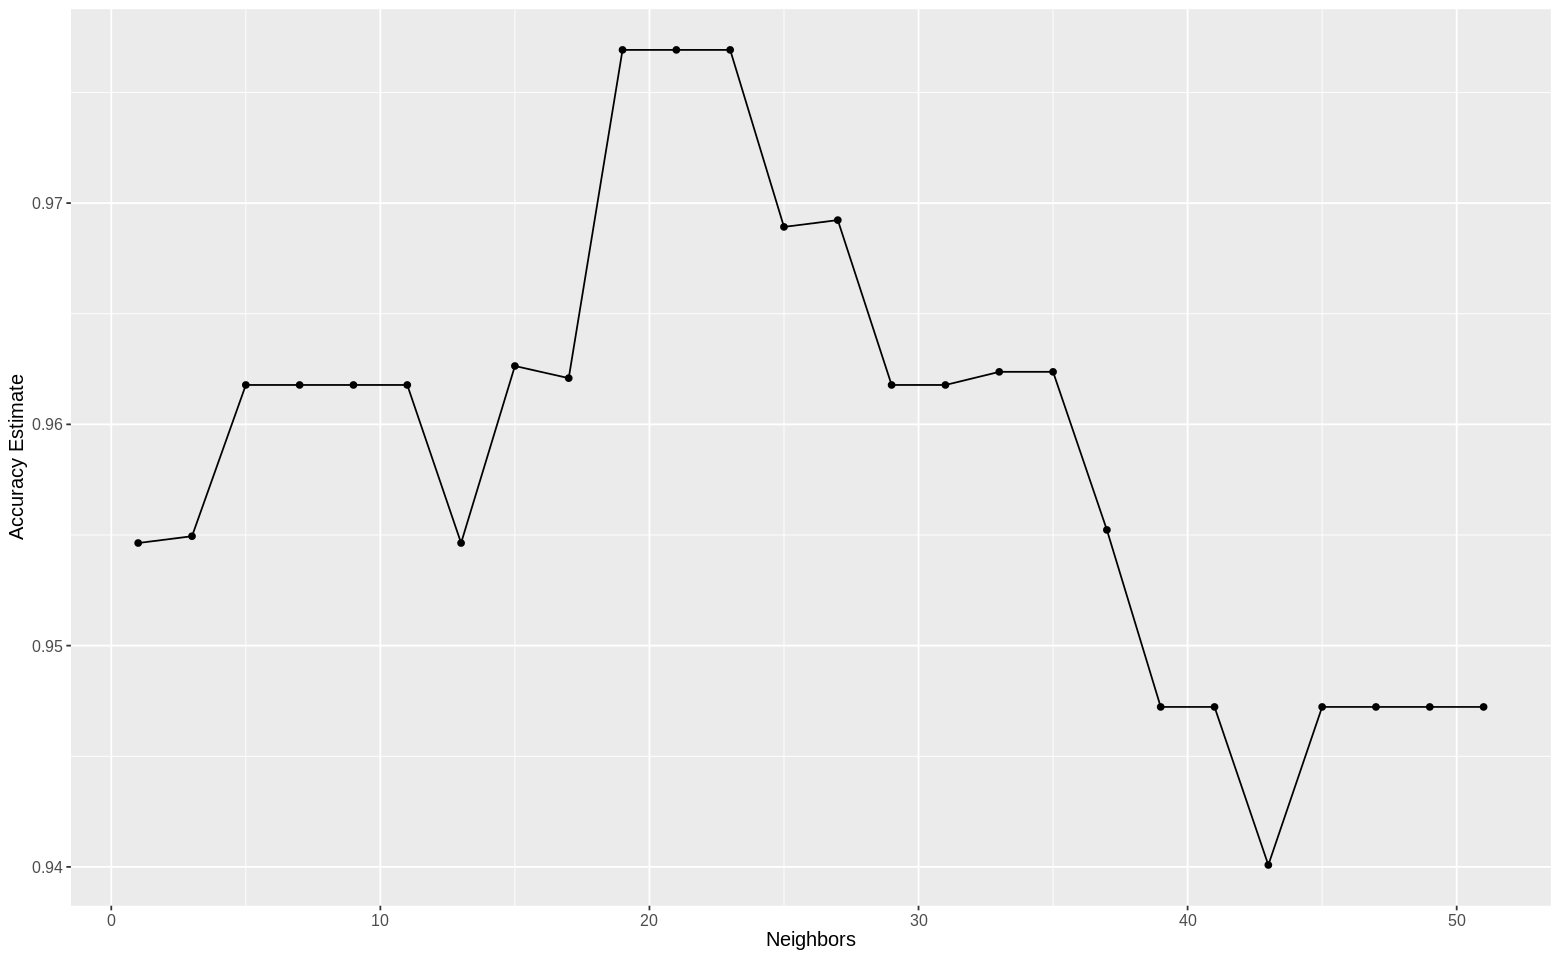

In [29]:
# Calculating accuracy using all variables as predictors, first doing cross validation to see which K to use

# We set the seed to make sure our conclusion to be repeatable
set.seed(333)

wine_all_vfold <- vfold_cv(wine_training, v = 5,strata = class)

wine_all_recipe <- recipe(class~.,
                     data = wine_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_all_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
                  set_engine("kknn") |>
                  set_mode("classification")


knn_results <- workflow() |>
      add_recipe(wine_all_recipe) |>
      add_model(knn_all_tune) |>
      tune_grid(resamples = wine_all_vfold, grid = k_vals) |>
      collect_metrics()

all_accuracies <- knn_results |>
      filter(.metric == "accuracy")

all_accuracy_vs_k <- ggplot(all_accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

all_accuracy_vs_k

best_k_all <- all_accuracies|>
        arrange(-mean)|>
        slice(1:10)|>
        select(mean,neighbors)

best_k_all

# therefore, we also choose to use K = 5 for the same reason in our selected-predictors model

In [30]:
wine_all_fit <- workflow() |>
          add_recipe(wine_all_recipe) |>
          add_model(knn_spec) |>
          fit(data = wine_training)

wine_all_accuracy <- predict(wine_all_fit, wine_testing) |>
        bind_cols(wine_testing)|>
        metrics(truth = class, estimate = .pred_class)|>
        filter(.metric == 'accuracy')|>
        pull(.estimate)

wine_all_accuracy

[1] 0.9333333

##### Accuracy with 5 most relevant variables = 0.9556, accuracy with all variables = 0.9333

Thus, the knn classification using K = 5 and selected variables yields an accuracy of 95.56 percent, which is very precise and indicates a high level of relationship with the predictors and the class, it is also about 2.2 percent higher than that of using all variables as predictors.

In [25]:
# drawing the confusion matrix for the selected prediction
confusion <- wine_test_predictions |>
             conf_mat(truth = class, estimate = .pred_class)

confusion
# We can see that the prediction for class 1 and 3 already worked highly accurately, 
# but 2 data points of class 2 were predicted as class 1, causing the decrease of our overall accuracy

          Truth
Prediction  1  2  3
         1 15  2  0
         2  0 16  0
         3  0  0 12